In [1]:
#imports
import pandas as pd
import seaborn as sns
import seaborn
import matplotlib.pyplot as plt
import matplotlib
import textwrap
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.pyplot import figure
import numpy as np
import folium
import squarify
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import plotly.graph_objects as go
from folium.plugins import MarkerCluster
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm
from sklearn import metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

data points: 

Monthly Data that is in the process of scraping from Toronto Real Estate Board:

Sales
Dollar Volume
Average Price
Median Price
New Listings 
SNLR Trend 
Active Listings 
Mos Inv (Trend)
Avg. SP/LP 
Avg. LDOM 
Avg. PDOM

look into daily 

monthly data available from stats can (via python) 

New Housing Price Index 

3yr Bond Rate
5yr Bond Rate
Bankers Acceptance rate 1 year 
Bank Rate 
Target Rate 
Prime Corporate Paper Rate 
Overnight Money Market Financing Rate
Mortgage Rate 


Employment Rate
Inflation Rate
Unemployement Rate 
GDP 
Residential building permits
Housing starts
Shelter price index
Population (15+)
Housing completions
Labour force

29 data points 


Choose hyperparams through grid search or AIC: 

In [2]:
#import t_stats, toronto_all_stats and exo stats 

In [52]:
# Import DataFrame from CSV
t_stats = pd.read_csv('t_stats.csv')

t_stats


,Month,Median Price
0,2013-01-01,413500
1,2013-02-01,434000
2,2013-03-01,441000
3,2013-04-01,453500
4,2013-05-01,478500
5,2013-06-01,455000
6,2013-07-01,439000
7,2013-08-01,423000
8,2013-09-01,451510
9,2013-10-01,467000


In [53]:
x_stats = pd.read_csv('x_stats.csv')

x_stats

,CPI_Can,New_Housing_Price_Index,Inflation,GDP,ON_Unemployment_Rate,Bank_Rate,CAN_Mort_Lending_Rate5yr,Mortgage_Var_Rate,Mortgage_Fixed_Rate_5yr,TO_Units_Absorbed,Bond_1-3yr_Avg
0,121.3,91.8,1.3,1729586.0,7.7,1.25,4.14,3.57,3.00,942.0,1.16
1,122.7,91.9,1.5,1734805.0,7.5,1.25,4.11,3.52,2.98,900.0,1.12
2,122.9,92.0,1.5,1740839.0,7.6,1.25,4.02,3.51,2.99,982.0,1.01
3,122.7,92.2,1.2,1743937.0,7.6,1.25,4.02,3.52,2.99,966.0,1.00
4,123.0,92.4,1.2,1748724.0,7.5,1.25,4.02,3.50,2.96,930.0,1.04
5,123.0,92.5,1.2,1742396.0,7.6,1.25,4.00,3.49,2.93,996.0,1.18
6,123.1,92.7,1.3,1752447.0,7.7,1.25,4.08,3.31,3.00,1085.0,1.17
7,123.1,92.8,1.2,1760130.0,7.7,1.25,4.14,3.13,3.11,1221.0,1.23
8,123.3,92.8,1.3,1766098.0,7.5,1.25,4.33,3.03,3.20,915.0,1.27
9,123.0,92.9,1.2,1775606.0,7.6,1.25,4.40,2.95,3.27,926.0,1.15


# START

# 2021

In [54]:
target_trainY = t_stats['Median Price'][:-29]
exog_trainY = x_stats[:-29]

In [55]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: 
 int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [56]:
from itertools import product
 
ps = range(0, 13, 1)
qs = range(0, 13, 1)    
Ps = [0]
Qs = [0]    

d = 1
D = 0
s = 12
 
ARIMA_order_list = list(product(ps, qs, Ps, Qs))

In [51]:
ARIMA_result_df = optimize_SARIMA(target_trainY, ARIMA_order_list, d, D, s)
ARIMA_result_df

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_60273/2473469477.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

,"(p,q,P,Q)",AIC
0,"(4, 5, 0, 0)",2228.243162
1,"(9, 9, 0, 0)",2229.687247
2,"(9, 11, 0, 0)",2232.781153
3,"(3, 2, 0, 0)",2233.245944
4,"(5, 5, 0, 0)",2233.334258
5,"(5, 2, 0, 0)",2233.429109
6,"(8, 9, 0, 0)",2234.199284
7,"(8, 7, 0, 0)",2234.309261
8,"(6, 6, 0, 0)",2234.692297
9,"(10, 10, 0, 0)",2234.954137


In [57]:
ARIMA_model1 = SARIMAX(target_trainY, order=(4,1,5), simple_differencing=False)
ARIMA_model1_fit = ARIMA_model1.fit(disp=False)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
test1 = t_stats.iloc[96:108]
test1

,Month,Median Price
96,2021-01-01,672000
97,2021-02-01,765000
98,2021-03-01,860000
99,2021-04-01,875000
100,2021-05-01,890000
101,2021-06-01,867000
102,2021-07-01,817700
103,2021-08-01,785000
104,2021-09-01,860000
105,2021-10-01,880900


In [60]:
test1['naive_seasonal'] = t_stats['Median Price'].iloc[84:96].values
test1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/739010285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['naive_seasonal'] = t_stats['Median Price'].iloc[84:96].values


,Month,Median Price,naive_seasonal
96,2021-01-01,672000,725000
97,2021-02-01,765000,788000
98,2021-03-01,860000,800000
99,2021-04-01,875000,749950
100,2021-05-01,890000,785000
101,2021-06-01,867000,815000
102,2021-07-01,817700,810000
103,2021-08-01,785000,815000
104,2021-09-01,860000,840000
105,2021-10-01,880900,836100


In [61]:
ARIMA_pred1 = ARIMA_model1_fit.get_prediction(96,107).predicted_mean
test1['ARIMA_pred1'] = ARIMA_pred1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/1934620625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['ARIMA_pred1'] = ARIMA_pred1


In [62]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1
96,2021-01-01,672000,725000,685922.888855
97,2021-02-01,765000,788000,700111.675352
98,2021-03-01,860000,800000,707985.305998
99,2021-04-01,875000,749950,706259.463972
100,2021-05-01,890000,785000,714207.389234
101,2021-06-01,867000,815000,720137.239534
102,2021-07-01,817700,810000,700848.360451
103,2021-08-01,785000,815000,678695.384322
104,2021-09-01,860000,840000,692401.303981
105,2021-10-01,880900,836100,725268.896344


In [19]:
#test with d=1, and D=1 and d=1, and D=0
ps = range(0, 5, 1)
qs = range(0, 5, 1)
Ps = range(0, 5, 1)
Qs = range(0, 5, 1)
 
SARIMA_order_list = list(product(ps, qs, Ps, Qs))
 
d = 1
D = 0
s = 12
 
SARIMA_result_df1 = optimize_SARIMA(target_trainY, SARIMA_order_list, d, D, s)
SARIMA_result_df1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/2473469477.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/625 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting sea

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization f

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization f

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting sea

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2221.837886
1,"(0, 3, 1, 1)",2222.503108
2,"(2, 1, 1, 1)",2222.630667
3,"(2, 0, 1, 1)",2222.694672
4,"(0, 0, 1, 2)",2223.212389
5,"(0, 0, 1, 1)",2223.414888
6,"(3, 0, 1, 2)",2223.488853
7,"(3, 0, 2, 1)",2223.509206
8,"(4, 0, 1, 1)",2223.612417
9,"(3, 1, 1, 1)",2223.613894


In [15]:
# (p,q,P,Q)	AIC
# 0	(3, 0, 1, 1)	2510.704583
# 1	(0, 3, 1, 1)	2511.036432
# 2	(2, 1, 1, 1)	2511.049245
# 3	(2, 0, 1, 1)	2512.267354

In [63]:
SARIMA_model1 = SARIMAX(target_trainY, order=(3,1,0), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model1_fit = SARIMA_model1.fit(disp=False)

SARIMA_model2 = SARIMAX(target_trainY, order=(0,1,3), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model2_fit = SARIMA_model2.fit(disp=False)

SARIMA_model3 = SARIMAX(target_trainY, order=(2,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model3_fit = SARIMA_model3.fit(disp=False)

SARIMA_model4 = SARIMAX(target_trainY, order=(4,1,5), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model4_fit = SARIMA_model4.fit(disp=False)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
#SARIMA_model1_fit.plot_diagnostics(figsize=(10,10));

In [65]:
# from statsmodels.stats.diagnostic import acorr_ljungbox
 
# residuals = SARIMA_model1_fit.resid

In [66]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1
96,2021-01-01,672000,725000,685922.888855
97,2021-02-01,765000,788000,700111.675352
98,2021-03-01,860000,800000,707985.305998
99,2021-04-01,875000,749950,706259.463972
100,2021-05-01,890000,785000,714207.389234
101,2021-06-01,867000,815000,720137.239534
102,2021-07-01,817700,810000,700848.360451
103,2021-08-01,785000,815000,678695.384322
104,2021-09-01,860000,840000,692401.303981
105,2021-10-01,880900,836100,725268.896344


In [67]:
SARIMA_pred1 = SARIMA_model1_fit.get_prediction(96,107).predicted_mean
 
test1['SARIMA_pred1'] = SARIMA_pred1

SARIMA_pred2 = SARIMA_model2_fit.get_prediction(96,107).predicted_mean
 
test1['SARIMA_pred2'] = SARIMA_pred2

SARIMA_pred3 = SARIMA_model3_fit.get_prediction(96,107).predicted_mean
 
test1['SARIMA_pred3'] = SARIMA_pred3

SARIMA_pred4 = SARIMA_model4_fit.get_prediction(96,107).predicted_mean
 
test1['SARIMA_pred4'] = SARIMA_pred4

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/93435459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['SARIMA_pred1'] = SARIMA_pred1
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/93435459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['SARIMA_pred2'] = SARIMA_pred2
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/93435459.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [97]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1,SARIMA_pred1,SARIMA_pred2,SARIMA_pred3,SARIMA_pred4
96,2021-01-01,672000,725000,685922.888855,707187.216449,706014.345716,706581.983254,708532.555949
97,2021-02-01,765000,788000,700111.675352,739632.688848,738000.179621,739265.133843,741495.921048
98,2021-03-01,860000,800000,707985.305998,754052.371375,752980.162799,751474.614017,755405.569406
99,2021-04-01,875000,749950,706259.463972,755206.712355,754574.589146,754317.580797,754469.521869
100,2021-05-01,890000,785000,714207.389234,761672.632454,762672.499300,762374.952412,763501.218062
101,2021-06-01,867000,815000,720137.239534,761366.488926,763153.485880,762632.485810,764215.566699
102,2021-07-01,817700,810000,700848.360451,749591.106127,751363.615737,750635.049816,751833.772233
103,2021-08-01,785000,815000,678695.384322,746278.196664,747865.660304,747081.901203,747157.314741
104,2021-09-01,860000,840000,692401.303981,764454.059002,765779.037229,765132.113793,764986.493254
105,2021-10-01,880900,836100,725268.896344,766864.435343,768165.721050,767662.344097,768255.843102


In [98]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
mape_naive_seasonal = mape(test1['Median Price'], test1['naive_seasonal'])
mape_ARIMA1 = mape(test1['Median Price'], test1['ARIMA_pred1'])
mape_SARIMA1 = mape(test1['Median Price'], test1['SARIMA_pred1'])
mape_SARIMA2 = mape(test1['Median Price'], test1['SARIMA_pred2'])
mape_SARIMA3 = mape(test1['Median Price'], test1['SARIMA_pred3'])
mape_SARIMA4 = mape(test1['Median Price'], test1['SARIMA_pred4'])

In [99]:
print("MAPE NAIVE: ", mape_naive_seasonal)
print("MAPE ARIMA1: ", mape_ARIMA1)
print("MAPE SARIMA1: ", mape_SARIMA1)
print("MAPE SARIMA2: ", mape_SARIMA2)
print("MAPE SARIMA3: ", mape_SARIMA3)
print("MAPE SARIMA4: ", mape_SARIMA4)

MAPE NAIVE:  6.698799094849396
MAPE ARIMA1:  14.580323775663793
MAPE SARIMA1:  9.753073823243085
MAPE SARIMA2:  9.656888200313404
MAPE SARIMA3:  9.717103668693662
MAPE SARIMA4:  9.593731336227853


In [71]:
# Create a dictionary with the MAPE and RMSE values
data = {'MAPE': [mape_naive_seasonal, mape_ARIMA1, mape_SARIMA1, mape_SARIMA2, mape_SARIMA3, mape_SARIMA4]}
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the index of the DataFrame to be the MAPE and RMSE titles
df.index = ['Naive - 2021' , 'ARIMA(4,1,5)', 'SARIMA(3,1,0)(1,0,1)', 'SARIMA(0,1,3)(1,0,1)', 'SARIMA(2,1,1)(1,0,1)', 
           'SARIMA(4,1,5)(1,0,1)']

# Display the DataFrame
df

,MAPE
Naive - 2021,6.698799
"ARIMA(4,1,5)",14.580324
"SARIMA(3,1,0)(1,0,1)",9.753074
"SARIMA(0,1,3)(1,0,1)",9.656888
"SARIMA(2,1,1)(1,0,1)",9.717104
"SARIMA(4,1,5)(1,0,1)",9.593731


In [72]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, 
 list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', 
 ascending=True).reset_index(drop=True)
    
    return result_df

In [73]:
p = range(0, 5, 1)
d = 1
q = range(0, 5, 1)
P = range(0, 5, 1)
D = 0
Q = range(0, 5, 1)
s = 12
 
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [50]:
result_df = optimize_SARIMAX(target_trainY, exog_trainY, parameters_list, d, D, s)
result_df

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/4118411627.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/625 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization f

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converg

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving ave

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converg

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converg

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few o

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anacon

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

,"(p,q,P,Q)",AIC
0,"(2, 2, 0, 0)",2207.377324
1,"(2, 2, 0, 1)",2208.407951
2,"(2, 2, 1, 0)",2208.448936
3,"(2, 3, 0, 0)",2210.360128
4,"(2, 2, 1, 1)",2210.671311
5,"(2, 2, 2, 1)",2211.944365
6,"(2, 2, 1, 2)",2213.037866
7,"(2, 2, 0, 2)",2213.184740
8,"(3, 2, 0, 0)",2213.279821
9,"(2, 2, 0, 3)",2213.966173


In [74]:
def recursive_forecast(parList, endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    p = parList[0]
    q = parList[1]
    d = parList[2]
    P = parList[3]
    Q = parList[4]
    D = parList[5]
    s = parList[6]
    
    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(p,d,q), seasonal_order=(P,D,Q,s), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

In [75]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1,SARIMA_pred1,SARIMA_pred2,SARIMA_pred3,SARIMA_pred4
96,2021-01-01,672000,725000,685922.888855,707187.216449,706014.345716,706581.983254,708532.555949
97,2021-02-01,765000,788000,700111.675352,739632.688848,738000.179621,739265.133843,741495.921048
98,2021-03-01,860000,800000,707985.305998,754052.371375,752980.162799,751474.614017,755405.569406
99,2021-04-01,875000,749950,706259.463972,755206.712355,754574.589146,754317.580797,754469.521869
100,2021-05-01,890000,785000,714207.389234,761672.632454,762672.499300,762374.952412,763501.218062
101,2021-06-01,867000,815000,720137.239534,761366.488926,763153.485880,762632.485810,764215.566699
102,2021-07-01,817700,810000,700848.360451,749591.106127,751363.615737,750635.049816,751833.772233
103,2021-08-01,785000,815000,678695.384322,746278.196664,747865.660304,747081.901203,747157.314741
104,2021-09-01,860000,840000,692401.303981,764454.059002,765779.037229,765132.113793,764986.493254
105,2021-10-01,880900,836100,725268.896344,766864.435343,768165.721050,767662.344097,768255.843102


In [109]:
target_testY = t_stats['Median Price'][96:108]
 
pred_df_Y = pd.DataFrame({'actual': target_testY})
 
TRAIN_LEN = len(target_trainY)
HORIZON = len(target_testY)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Y = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# (p,q,P,Q)	AIC
# 0	(2, 2, 0, 0)	2207.377324
# 1	(2, 2, 0, 1)	2208.407951
# 2	(2, 2, 1, 0)	2208.448936
# 3	(2, 3, 0, 0)	2210.360128

parList = [2,2,1,0,0,0,12]

pred_SARIMAX_Y1 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [2,2,1,0,1,0,12]

pred_SARIMAX_Y2 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [2,2,1,1,0,0,12]

pred_SARIMAX_Y3 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [2,2,1,1,1,0,12]
pred_SARIMAX_Y4 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')


pred_df_Y['pred_last_value_Y'] = pred_last_value_Y
pred_df_Y['pred_SARIMAX_Y1'] = pred_SARIMAX_Y1
pred_df_Y['pred_SARIMAX_Y2'] = pred_SARIMAX_Y2
pred_df_Y['pred_SARIMAX_Y3'] = pred_SARIMAX_Y3
pred_df_Y['pred_SARIMAX_Y4'] = pred_SARIMAX_Y4
pred_df_Y['pred_SARIMA_Y'] = SARIMA_pred2
pred_df_Y['pred_ARIMA_Y'] = ARIMA_pred1

pred_df_Y

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y
96,672000,700000,747238.178037,746494.963140,746649.707164,746812.335480,706014.345716,685922.888855
97,765000,672000,683782.313761,683856.781872,683435.813788,682327.936651,738000.179621,700111.675352
98,860000,765000,717132.361186,722035.031269,717149.908353,719575.895348,752980.162799,707985.305998
99,875000,860000,839627.596057,840192.978161,839866.936978,838282.828255,754574.589146,706259.463972
100,890000,875000,880153.721571,875971.774136,879702.121577,875348.454988,762672.499300,714207.389234
101,867000,890000,886205.112611,887114.844739,896368.743692,891601.313659,763153.485880,720137.239534
102,817700,867000,897381.765466,898786.063000,896045.766510,918567.674240,751363.615737,700848.360451
103,785000,817700,884631.823653,886332.458330,886252.467222,884876.255822,747865.660304,678695.384322
104,860000,785000,832426.647848,838507.818062,841225.637160,835883.010744,765779.037229,692401.303981
105,880900,860000,816858.712484,813873.006270,810633.844376,814925.621224,768165.721050,725268.896344


In [127]:
pred_df_Y['pred_naive_seasonal'] = t_stats['Median Price'].iloc[84:96].values
pred_df_Y['pred_lstm_st'] = [798364.9879992 , 816120.04515529, 825328.71720195, 831522.96057343,
       841163.23003173, 847678.18316817, 851205.85551858, 853523.15071225,
       853131.80240989, 850235.48731208, 848008.55001807, 849027.30494738] #keep 

pred_df_Y['pred_lstm_mt'] = [766166.17330909, 800391.08493924, 800895.68451047, 818089.24633265,
       780617.52820015, 823980.50710559, 799444.758147  , 746109.5559299 ,
       811261.34961843, 826996.25265598, 830922.53300548, 818049.26735163] #keep 

pred_df_Y['pred_lstm_st1'] = [828659.80371833, 827903.98487449, 823268.21267605, 821673.2404232 ,
       826661.66505218, 831931.32695556, 836344.47970986, 840284.80672836,
       842149.80593324, 843991.50657654, 847802.17203498, 853999.92707372] #keep 

pred_df_Y['pred_lstm_mt1'] = [823573.66019487, 844054.31139469, 853517.78191328, 818997.65387177,
       856268.02515984, 860662.57283092, 884860.35758257, 869345.2038765 ,
       899726.08920932, 874294.76380348, 887428.97334695, 845793.59966516]
pred_df_Y

,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y,pred_naive_seasonal,pred_lstm_st,pred_lstm_mt,pred_lstm_st1,pred_lstm_mt1
96,672000,700000,747238.178037,746494.963140,746649.707164,746812.335480,706014.345716,685922.888855,725000,798364.987999,766166.173309,828659.803718,823573.660195
97,765000,672000,683782.313761,683856.781872,683435.813788,682327.936651,738000.179621,700111.675352,788000,816120.045155,800391.084939,827903.984874,844054.311395
98,860000,765000,717132.361186,722035.031269,717149.908353,719575.895348,752980.162799,707985.305998,800000,825328.717202,800895.684510,823268.212676,853517.781913
99,875000,860000,839627.596057,840192.978161,839866.936978,838282.828255,754574.589146,706259.463972,749950,831522.960573,818089.246333,821673.240423,818997.653872
100,890000,875000,880153.721571,875971.774136,879702.121577,875348.454988,762672.499300,714207.389234,785000,841163.230032,780617.528200,826661.665052,856268.025160
101,867000,890000,886205.112611,887114.844739,896368.743692,891601.313659,763153.485880,720137.239534,815000,847678.183168,823980.507106,831931.326956,860662.572831
102,817700,867000,897381.765466,898786.063000,896045.766510,918567.674240,751363.615737,700848.360451,810000,851205.855519,799444.758147,836344.479710,884860.357583
103,785000,817700,884631.823653,886332.458330,886252.467222,884876.255822,747865.660304,678695.384322,815000,853523.150712,746109.555930,840284.806728,869345.203877
104,860000,785000,832426.647848,838507.818062,841225.637160,835883.010744,765779.037229,692401.303981,840000,853131.802410,811261.349618,842149.805933,899726.089209
105,880900,860000,816858.712484,813873.006270,810633.844376,814925.621224,768165.721050,725268.896344,836100,850235.487312,826996.252656,843991.506577,874294.763803


In [128]:
mape_last_Y = mape(pred_df_Y.actual, pred_df_Y.pred_last_value_Y)
mape_seasonal_Y = mape(pred_df_Y.actual, pred_df_Y.pred_naive_seasonal)
mape_LSTM_ST_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_st)
mape_LSTM_MT_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_mt)
mape_LSTM_ST1_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_st1)
mape_LSTM_MT1_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_mt1)
mape_SARIMAX_Y1 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y1)
mape_SARIMAX_Y2 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y2)
mape_SARIMAX_Y3 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y3)
mape_SARIMAX_Y4 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y4)
mape_SARIMA_Y = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMA_Y)
mape_ARIMA_Y = mape(pred_df_Y.actual, pred_df_Y.pred_ARIMA_Y)

rmse_last_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_last_value_Y)
rmse_seasonal_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_naive_seasonal)
rmse_LSTM_ST_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_st)
rmse_LSTM_MT_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_mt)
rmse_LSTM_ST1_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_st1)
rmse_LSTM_MT1_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_mt1)
rmse_SARIMAX_Y1 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y1)
rmse_SARIMAX_Y2 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y2)
rmse_SARIMAX_Y3 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y3)
rmse_SARIMAX_Y4 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y4)
rmse_SARIMA_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMA_Y)
rmse_ARIMA_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_ARIMA_Y)

print("MAPE LAST_Y: ", mape_last_Y)
print("MAPE SEASONAL_Y: ", mape_seasonal_Y)
print("MAPE LSTM_ST_Y: ", mape_LSTM_ST_Y)
print("MAPE LSTM_MT_Y: ", mape_LSTM_MT_Y)
print("MAPE LSTM_ST1_Y: ", mape_LSTM_ST1_Y)
print("MAPE LSTM_MT1_Y: ", mape_LSTM_MT1_Y)
print("MAPE ARIMA_Y: ", mape_ARIMA_Y)
print("MAPE SARIMA_Y: ", mape_SARIMA_Y)
print("MAPE SARIMAX_Y1: ", mape_SARIMAX_Y1)
print("MAPE SARIMAX_Y2: ", mape_SARIMAX_Y2)
print("MAPE SARIMAX_Y3: ", mape_SARIMAX_Y3)
print("MAPE SARIMAX_Y4: ", mape_SARIMAX_Y4, '\n')

print("RMSE LAST_Y: ", rmse_last_Y)
print("RMSE SEASONAL_Y: ", rmse_seasonal_Y)
print("RMSE LSTM_ST_Y: ", rmse_LSTM_ST_Y)
print("RMSE LSTM_MT_Y: ", rmse_LSTM_MT_Y)
print("RMSE LSTM_ST1_Y: ", rmse_LSTM_ST1_Y)
print("RMSE LSTM_MT1_Y: ", rmse_LSTM_MT1_Y)
print("RMSE ARIMA_Y: ", rmse_ARIMA_Y)
print("RMSE SARIMA_Y: ", rmse_SARIMA_Y)
print("RMSE SARIMAX_Y1: ", rmse_SARIMAX_Y1)
print("RMSE SARIMAX_Y2: ", rmse_SARIMAX_Y2)
print("RMSE SARIMAX_Y3: ", rmse_SARIMAX_Y3)
print("RMSE SARIMAX_Y4: ", rmse_SARIMAX_Y4)

MAPE LAST_Y:  5.3598302452242725
MAPE SEASONAL_Y:  6.698799094849396
MAPE LSTM_ST_Y:  5.510528581697717
MAPE LSTM_MT_Y:  5.9435667572691715
MAPE LSTM_ST1_Y:  6.338597965119684
MAPE LSTM_MT1_Y:  6.666543179243741
MAPE ARIMA_Y:  14.580323775663793
MAPE SARIMA_Y:  9.656888200313404
MAPE SARIMAX_Y1:  8.145069929507024
MAPE SARIMAX_Y2:  8.138151999582822
MAPE SARIMAX_Y3:  8.328840169476214
MAPE SARIMAX_Y4:  8.236321437636205 

RMSE LAST_Y:  51732.80712790805
RMSE SEASONAL_Y:  65977.95244120064
RMSE LSTM_ST_Y:  52846.7406923006
RMSE LSTM_MT_Y:  56372.21751496151
RMSE LSTM_ST1_Y:  61768.039539055084
RMSE LSTM_MT1_Y:  65188.35203273963
RMSE ARIMA_Y:  131720.673346214
RMSE SARIMA_Y:  88279.75862791884
RMSE SARIMAX_Y1:  75132.5980990649
RMSE SARIMAX_Y2:  74772.79619537905
RMSE SARIMAX_Y3:  76638.38348914825
RMSE SARIMAX_Y4:  75625.03303180514


In [139]:
import pandas as pd

# Create a dictionary with the MAPE and RMSE values
data = {'MAPE': [mape_seasonal_Y, mape_LSTM_ST_Y, mape_LSTM_MT_Y, mape_LSTM_ST1_Y, mape_LSTM_MT1_Y, mape_SARIMAX_Y1, mape_SARIMAX_Y2, mape_SARIMAX_Y3, mape_SARIMAX_Y4, mape_SARIMA_Y, mape_ARIMA_Y],
        'RMSE': [rmse_seasonal_Y, rmse_LSTM_ST_Y, rmse_LSTM_MT_Y,rmse_LSTM_ST1_Y, rmse_LSTM_MT1_Y, rmse_SARIMAX_Y1, rmse_SARIMAX_Y2, rmse_SARIMAX_Y3, rmse_SARIMAX_Y4, rmse_SARIMA_Y, rmse_ARIMA_Y]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the index of the DataFrame to be the MAPE and RMSE titles
df.index = ['Naive - 2020' , 'LSTM Single-Step X', 'LSTM Multi-Step X', 'LSTM Single-Step noX', 'LSTM Multi-Step noX', 
            'SARIMAX(2,1,2)(0,0,0)', 'SARIMAX(2,1,2)(0,0,1)', 'SARIMAX(2,1,2)(1,0,0)', 'SARIMAX(2,1,2)(1,0,1)', 
            'SARIMA(4,1,5)(1,0,1)', 'ARIMA(4,1,5)']

# Display the DataFrame
df

,MAPE,RMSE
Naive - 2020,6.698799,65977.952441
LSTM Single-Step X,5.510529,52846.740692
LSTM Multi-Step X,5.943567,56372.217515
LSTM Single-Step noX,6.338598,61768.039539
LSTM Multi-Step noX,6.666543,65188.352033
"SARIMAX(2,1,2)(0,0,0)",8.145070,75132.598099
"SARIMAX(2,1,2)(0,0,1)",8.138152,74772.796195
"SARIMAX(2,1,2)(1,0,0)",8.328840,76638.383489
"SARIMAX(2,1,2)(1,0,1)",8.236321,75625.033032
"SARIMA(4,1,5)(1,0,1)",9.656888,88279.758628


In [131]:
pred_df_Y_PLOT = pred_df_Y.copy()
pred_df_Y_PLOT['Month'] = t_stats['Month'].iloc[96:108]
cols = pred_df_Y_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Y_PLOT = pred_df_Y_PLOT[cols]
pred_df_Y_PLOT

,Month,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y,pred_naive_seasonal,pred_lstm_st,pred_lstm_mt,pred_lstm_st1,pred_lstm_mt1
96,2021-01-01,672000,700000,747238.178037,746494.963140,746649.707164,746812.335480,706014.345716,685922.888855,725000,798364.987999,766166.173309,828659.803718,823573.660195
97,2021-02-01,765000,672000,683782.313761,683856.781872,683435.813788,682327.936651,738000.179621,700111.675352,788000,816120.045155,800391.084939,827903.984874,844054.311395
98,2021-03-01,860000,765000,717132.361186,722035.031269,717149.908353,719575.895348,752980.162799,707985.305998,800000,825328.717202,800895.684510,823268.212676,853517.781913
99,2021-04-01,875000,860000,839627.596057,840192.978161,839866.936978,838282.828255,754574.589146,706259.463972,749950,831522.960573,818089.246333,821673.240423,818997.653872
100,2021-05-01,890000,875000,880153.721571,875971.774136,879702.121577,875348.454988,762672.499300,714207.389234,785000,841163.230032,780617.528200,826661.665052,856268.025160
101,2021-06-01,867000,890000,886205.112611,887114.844739,896368.743692,891601.313659,763153.485880,720137.239534,815000,847678.183168,823980.507106,831931.326956,860662.572831
102,2021-07-01,817700,867000,897381.765466,898786.063000,896045.766510,918567.674240,751363.615737,700848.360451,810000,851205.855519,799444.758147,836344.479710,884860.357583
103,2021-08-01,785000,817700,884631.823653,886332.458330,886252.467222,884876.255822,747865.660304,678695.384322,815000,853523.150712,746109.555930,840284.806728,869345.203877
104,2021-09-01,860000,785000,832426.647848,838507.818062,841225.637160,835883.010744,765779.037229,692401.303981,840000,853131.802410,811261.349618,842149.805933,899726.089209
105,2021-10-01,880900,860000,816858.712484,813873.006270,810633.844376,814925.621224,768165.721050,725268.896344,836100,850235.487312,826996.252656,843991.506577,874294.763803


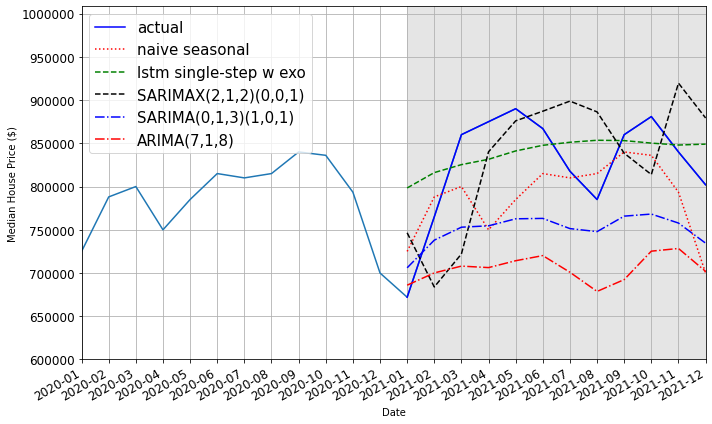

In [400]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Y_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Y_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Y_PLOT['pred_lstm_st'], 'g--', label='lstm single-step w exo')
ax.plot(pred_df_Y_PLOT['pred_SARIMAX_Y2'], 'k--', label='SARIMAX(2,1,2)(0,0,1)')
ax.plot(pred_df_Y_PLOT['pred_SARIMA_Y'], 'b-.', label='SARIMA(0,1,3)(1,0,1)')
ax.plot(pred_df_Y_PLOT['pred_ARIMA_Y'], 'r-.', label='ARIMA(7,1,8)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(96, 108, color='#808080', alpha=0.2)
ax.set_xlim(84, 107)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 15})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

#comment on data, variation in seasons and trends (shows success for other dataset)

In [399]:
best_modelSARIMAX = SARIMAX(target_trainY, exog_trainY, order=(2,1,2), 
 seasonal_order=(0,0,1,12), simple_differencing=False)
best_modelSARIMAX = best_modelSARIMAX.fit(disp=False)
 
print(best_modelSARIMAX.summary())

best_modelSARIMA = SARIMAX(target_trainY, order=(0,1,3), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMA = best_modelSARIMA.fit(disp=False)
 
print(best_modelSARIMA.summary())

best_modelARIMA = SARIMAX(target_trainY, order=(7,1,8), simple_differencing=False)
best_modelARIMA = best_modelARIMA.fit(disp=False)
 
print(best_modelARIMA.summary())

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                         Median Price   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(0, 0, [1], 12)   Log Likelihood               -1087.204
Date:                              Wed, 30 Aug 2023   AIC                           2208.408
Time:                                      00:01:28   BIC                           2251.824
Sample:                                           0   HQIC                          2225.951
                                               - 96                                         
Covariance Type:                                opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPI_Can                    2.68e+04      0.005   5.38e+06      0.000  

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 2021 FISCAL QUARTERS 

In [143]:
target_trainQ1 = t_stats['Median Price'][:-29] 
exog_trainQ1 = x_stats[:-29]

target_trainQ2 = t_stats['Median Price'][:-26]
exog_trainQ2 = x_stats[:-26]

target_trainQ3 = t_stats['Median Price'][:-23]
exog_trainQ3 = x_stats[:-23]

target_trainQ4 = t_stats['Median Price'][:-20]
exog_trainQ4 = x_stats[:-20]

In [146]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
 
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: 
 int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

 
ps = range(0, 13, 1)
qs = range(0, 13, 1)    
Ps = [0]
Qs = [0]    

d = 1
D = 0
s = 12
 
ARIMA_order_list = list(product(ps, qs, Ps, Qs))

ARIMA_result_df1 = optimize_SARIMA(target_trainQ1, ARIMA_order_list, d, D, s)
ARIMA_result_df2 = optimize_SARIMA(target_trainQ2, ARIMA_order_list, d, D, s)
ARIMA_result_df3 = optimize_SARIMA(target_trainQ3, ARIMA_order_list, d, D, s)
ARIMA_result_df4 = optimize_SARIMA(target_trainQ4, ARIMA_order_list, d, D, s)

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/367736930.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/367736930.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/

  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

In [151]:
ARIMA_result_df1.iloc[0:1]

,"(p,q,P,Q)",AIC
0,"(4, 5, 0, 0)",2228.243162


In [157]:
ARIMA_result_df2.iloc[0:2]

,"(p,q,P,Q)",AIC
0,"(6, 5, 0, 0)",24.000000
1,"(5, 5, 0, 0)",2312.923113


In [153]:
ARIMA_result_df3.iloc[0:1]

,"(p,q,P,Q)",AIC
0,"(5, 2, 0, 0)",2383.484199


In [154]:
ARIMA_result_df4.iloc[0:1]

,"(p,q,P,Q)",AIC
0,"(4, 5, 0, 0)",2451.973999


In [158]:
t_stats

,Month,Median Price
0,2013-01-01,413500
1,2013-02-01,434000
2,2013-03-01,441000
3,2013-04-01,453500
4,2013-05-01,478500
5,2013-06-01,455000
6,2013-07-01,439000
7,2013-08-01,423000
8,2013-09-01,451510
9,2013-10-01,467000


In [159]:
ARIMA_model1 = SARIMAX(target_trainQ1, order=(4,1,5), simple_differencing=False)
ARIMA_model1_fit = ARIMA_model1.fit(disp=False)

ARIMA_model2 = SARIMAX(target_trainQ2, order=(5,1,5), simple_differencing=False)
ARIMA_model2_fit = ARIMA_model2.fit(disp=False)

ARIMA_model3 = SARIMAX(target_trainQ3, order=(5,1,2), simple_differencing=False)
ARIMA_model3_fit = ARIMA_model3.fit(disp=False)

ARIMA_model4 = SARIMAX(target_trainQ4, order=(4,1,5), simple_differencing=False)
ARIMA_model4_fit = ARIMA_model4.fit(disp=False)

test1 = t_stats.iloc[96:99]
test2 = t_stats.iloc[99:102]
test3 = t_stats.iloc[102:105]
test4 = t_stats.iloc[105:108]

test1['naive_seasonal'] = t_stats['Median Price'].iloc[84:87].values
test2['naive_seasonal'] = t_stats['Median Price'].iloc[87:90].values
test3['naive_seasonal'] = t_stats['Median Price'].iloc[90:93].values
test4['naive_seasonal'] = t_stats['Median Price'].iloc[93:96].values

ARIMA_pred1 = ARIMA_model1_fit.get_prediction(96,99).predicted_mean
test1['ARIMA_pred'] = ARIMA_pred1

ARIMA_pred2 = ARIMA_model2_fit.get_prediction(99,102).predicted_mean
test2['ARIMA_pred'] = ARIMA_pred2

ARIMA_pred3 = ARIMA_model3_fit.get_prediction(102,105).predicted_mean
test3['ARIMA_pred'] = ARIMA_pred3

ARIMA_pred4 = ARIMA_model4_fit.get_prediction(105,108).predicted_mean
test4['ARIMA_pred'] = ARIMA_pred4

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaco

In [165]:
test4

,Month,Median Price,naive_seasonal,ARIMA_pred
105,2021-10-01,880900,836100,901090.440878
106,2021-11-01,840000,793500,898882.462500
107,2021-12-01,802000,700000,861710.934881


In [166]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)
 
SARIMA_order_list = list(product(ps, qs, Ps, Qs))
 
d = 1
D = 0
s = 12
 
SARIMA_result_df1 = optimize_SARIMA(target_trainQ1, SARIMA_order_list, d, D, s)
SARIMA_result_df2 = optimize_SARIMA(target_trainQ2, SARIMA_order_list, d, D, s)
SARIMA_result_df3 = optimize_SARIMA(target_trainQ3, SARIMA_order_list, d, D, s)
SARIMA_result_df4 = optimize_SARIMA(target_trainQ4, SARIMA_order_list, d, D, s)

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/367736930.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization f

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/367736930.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sari

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converg

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converg

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting sea

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving ave

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

In [179]:
SARIMA_result_df1[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2221.837886
1,"(0, 3, 1, 1)",2222.503108
2,"(2, 1, 1, 1)",2222.630667
3,"(2, 0, 1, 1)",2222.694672
4,"(0, 0, 1, 2)",2223.212389
5,"(0, 0, 1, 1)",2223.414888
6,"(3, 0, 1, 2)",2223.488853
7,"(3, 0, 2, 1)",2223.509206
8,"(3, 1, 1, 1)",2223.613894
9,"(3, 0, 3, 0)",2224.096593


In [180]:
SARIMA_result_df2[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2301.621840
1,"(0, 3, 1, 1)",2302.072685
2,"(2, 1, 1, 1)",2302.453762
3,"(2, 0, 1, 1)",2303.110601
4,"(3, 0, 1, 2)",2303.275410
5,"(3, 0, 2, 1)",2303.319595
6,"(3, 1, 1, 1)",2303.511528
7,"(0, 3, 1, 2)",2303.764733
8,"(0, 3, 2, 1)",2303.804030
9,"(1, 3, 1, 1)",2303.966294


In [181]:
SARIMA_result_df3[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2369.893847
1,"(0, 3, 1, 1)",2370.007526
2,"(2, 1, 1, 1)",2370.579143
3,"(3, 0, 1, 2)",2371.516880
4,"(3, 0, 2, 1)",2371.559400
5,"(0, 3, 1, 2)",2371.642761
6,"(0, 3, 2, 1)",2371.684432
7,"(2, 0, 1, 1)",2371.702581
8,"(3, 1, 1, 1)",2371.861208
9,"(1, 3, 1, 1)",2371.910905


In [182]:
SARIMA_result_df4[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2442.567599
1,"(2, 1, 1, 1)",2442.983275
2,"(0, 3, 1, 1)",2443.239161
3,"(3, 0, 1, 2)",2444.061490
4,"(3, 0, 2, 1)",2444.112655
5,"(3, 1, 1, 1)",2444.467285
6,"(2, 1, 1, 2)",2444.602780
7,"(2, 2, 1, 1)",2444.620207
8,"(2, 1, 2, 1)",2444.633962
9,"(2, 0, 1, 1)",2444.738618


In [392]:
SARIMA_model1 = SARIMAX(target_trainQ1, order=(3,1,0), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model1_fit = SARIMA_model1.fit(disp=False)  

SARIMA_model2 = SARIMAX(target_trainQ2, order=(3,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model2_fit = SARIMA_model2.fit(disp=False)

SARIMA_model3 = SARIMAX(target_trainQ3, order=(2,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model3_fit = SARIMA_model3.fit(disp=False)

SARIMA_model4 = SARIMAX(target_trainQ4, order=(3,1,0), seasonal_order=(2,0,1,12), simple_differencing=False)
SARIMA_model4_fit = SARIMA_model4.fit(disp=False)

SARIMA_pred1 = SARIMA_model1_fit.get_prediction(96,99).predicted_mean
test1['SARIMA_pred'] = SARIMA_pred1

SARIMA_pred2 = SARIMA_model2_fit.get_prediction(99,102).predicted_mean
test2['SARIMA_pred'] = SARIMA_pred2

SARIMA_pred3 = SARIMA_model3_fit.get_prediction(102,105).predicted_mean
test3['SARIMA_pred'] = SARIMA_pred3

SARIMA_pred4 = SARIMA_model4_fit.get_prediction(105,108).predicted_mean
test4['SARIMA_pred'] = SARIMA_pred4

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/3200929780.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['SARIMA_pred'] = SARIMA_pred1
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/3200929780.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['SARIMA_pred'] = SARIMA_pred2
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/3200929780.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [382]:
test4

,Month,Median Price,naive_seasonal,ARIMA_pred,SARIMA_pred
105,2021-10-01,880900,836100,901090.440878,873463.554970
106,2021-11-01,840000,793500,898882.462500,858796.811803
107,2021-12-01,802000,700000,861710.934881,829630.338916


In [324]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, 
 list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', 
 ascending=True).reset_index(drop=True)
    
    return result_df



p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
 
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [193]:
result_df1 = optimize_SARIMAX(target_trainQ1, exog_trainQ1, parameters_list, d, D, s)
result_df2 = optimize_SARIMAX(target_trainQ2, exog_trainQ2, parameters_list, d, D, s)
result_df3 = optimize_SARIMAX(target_trainQ3, exog_trainQ3, parameters_list, d, D, s)
result_df4 = optimize_SARIMAX(target_trainQ4, exog_trainQ4, parameters_list, d, D, s)

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/1028661895.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/1028661895.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converg

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opt

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opt

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting sea

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few o

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anacon

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users

In [325]:
result_df4 = optimize_SARIMAX(target_trainQ4, exog_trainQ4, parameters_list, d, D, s)

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62401/1266213915.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

In [194]:
result_df1.iloc[0:8]

,"(p,q,P,Q)",AIC
0,"(2, 2, 0, 0)",2207.377324
1,"(2, 2, 0, 1)",2208.407951
2,"(2, 2, 1, 0)",2208.448936
3,"(2, 3, 0, 0)",2210.360128
4,"(2, 2, 1, 1)",2210.671311
5,"(2, 2, 2, 1)",2211.944365
6,"(2, 2, 1, 2)",2213.037866
7,"(2, 2, 0, 2)",2213.184740


In [195]:
result_df2.iloc[0:8]

,"(p,q,P,Q)",AIC
0,"(2, 2, 0, 0)",2288.032052
1,"(2, 2, 0, 1)",2289.648549
2,"(2, 2, 1, 0)",2289.717424
3,"(3, 2, 0, 0)",2289.806928
4,"(2, 2, 1, 1)",2292.893100
5,"(2, 3, 0, 1)",2293.433801
6,"(3, 3, 0, 0)",2294.081121
7,"(2, 2, 0, 2)",2295.509030


In [196]:
result_df3.iloc[0:8]

,"(p,q,P,Q)",AIC
0,"(2, 2, 0, 0)",2353.506728
1,"(3, 3, 0, 0)",2359.239080
2,"(2, 2, 1, 3)",2360.220597
3,"(2, 2, 1, 2)",2360.537693
4,"(3, 3, 0, 2)",2360.727099
5,"(2, 3, 1, 0)",2360.861013
6,"(2, 2, 0, 1)",2360.961624
7,"(3, 3, 1, 0)",2361.201356


In [327]:
result_df4.iloc[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 2, 0, 0)",2113.920249
1,"(3, 2, 1, 0)",2116.088399
2,"(2, 2, 0, 0)",2116.302475
3,"(2, 2, 1, 0)",2117.944989
4,"(2, 2, 0, 1)",2117.983586
5,"(2, 3, 0, 0)",2118.230719
6,"(0, 0, 1, 0)",2119.203332
7,"(1, 0, 0, 0)",2119.222372
8,"(0, 1, 0, 0)",2119.239695
9,"(3, 2, 2, 1)",2119.772233


In [ ]:
def recursive_forecast(parList, endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    p = parList[0]
    q = parList[1]
    d = parList[2]
    P = parList[3]
    Q = parList[4]
    D = parList[5]
    s = parList[6]
    
    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(p,d,q), seasonal_order=(P,D,Q,s), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

In [238]:
# target_testQ2 = t_stats['Median Price'][99:102]
# target_testQ3 = t_stats['Median Price'][102:105]
# target_testQ3 = t_stats['Median Price'][105:108]

target_testQ1 = t_stats['Median Price'][96:99]
pred_df_Q1 = pd.DataFrame({'actual': target_testQ1})
pred_df_Q1['pred_naive_seasonal'] = t_stats['Median Price'].iloc[84:87].values  
TRAIN_LEN = len(target_trainQ1)
HORIZON = len(target_testQ1)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Q1 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# (p,q,P,Q)	AIC
# 0	(2, 2, 0, 0)	2207.377324
# 1	(2, 2, 0, 1)	2208.407951
# 2	(2, 2, 1, 0)	2208.448936
# 3	(2, 3, 0, 0)	2210.360128
# 4	(2, 2, 1, 1)	2210.671311


parList = [2,3,1,0,0,0,12]
pred_SARIMAX_Q1 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df_Q1['pred_last_value_Q1'] = pred_last_value_Q1
pred_df_Q1['pred_SARIMAX_Q1'] = pred_SARIMAX_Q1
pred_df_Q1['pred_SARIMA_Q1'] = test1['SARIMA_pred'].copy()
pred_df_Q1['pred_ARIMA_Q1'] = test1['ARIMA_pred'].copy()

pred_df_Q1['pred_lstm_st'] = [802515.98128676, 803848.45641255, 805207.70800114]

pred_df_Q1['pred_lstm_st1'] = [802735.73061824, 800823.93169403, 800090.22960067]

pred_df_Q1['pred_lstm_mt'] = [801151.86738968, 815821.35084271, 815605.95732927]

pred_df_Q1['pred_lstm_mt1'] = [809673.06303978, 806928.28989029, 810681.11413717]


mape_last_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_last_value_Q1)
mape_seasonal_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_naive_seasonal)
mape_LSTM_ST_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_lstm_st)
mape_LSTM_MT_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_lstm_mt)
mape_LSTM_ST1_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_lstm_st1)
mape_LSTM_MT1_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_lstm_mt1)
mape_SARIMAX_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_SARIMAX_Q1)
mape_SARIMA_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_SARIMA_Q1)
mape_ARIMA_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_ARIMA_Q1)

rmse_last_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_last_value_Q1)
rmse_seasonal_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_naive_seasonal)
rmse_LSTM_ST_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_lstm_st)
rmse_LSTM_MT_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_lstm_mt)
rmse_LSTM_ST1_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_lstm_st1)
rmse_LSTM_MT1_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_lstm_mt1)
rmse_SARIMAX_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_SARIMAX_Q1)
rmse_SARIMA_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_SARIMA_Q1)
rmse_ARIMA_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_ARIMA_Q1)


print("MAPE LAST_Q1: ", mape_last_Q1)
print("MAPE SEASONAL_Q1: ", mape_seasonal_Q1)
print("MAPE LSTM_ST_Q1: ", mape_LSTM_ST_Q1)
print("MAPE LSTM_MT_Q1: ", mape_LSTM_MT_Q1)
print("MAPE LSTM_ST1_Q1: ", mape_LSTM_ST1_Q1)
print("MAPE LSTM_MT1_Q1: ", mape_LSTM_MT1_Q1)
print("MAPE ARIMA_Q1: ", mape_ARIMA_Q1)
print("MAPE SARIMA_Q1: ", mape_SARIMA_Q1)
print("MAPE SARIMAX_Q1: ", mape_SARIMAX_Q1, '\n')

print("RMSE LAST_Q1: ", rmse_last_Q1)
print("RMSE SEASONAL_Q1: ", rmse_seasonal_Q1)
print("RMSE LSTM_ST_Q1: ", rmse_LSTM_ST_Q1)
print("RMSE LSTM_MT_Q1: ", rmse_LSTM_MT_Q1)
print("RMSE LSTM_ST1_Q1: ", rmse_LSTM_ST1_Q1)
print("RMSE LSTM_MT1_Q1: ", rmse_LSTM_MT1_Q1)
print("RMSE ARIMA_Q1: ", rmse_ARIMA_Q1)
print("RMSE SARIMA_Q1: ", rmse_SARIMA_Q1)
print("RMSE SARIMAX_Q1: ", rmse_SARIMAX_Q1)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE LAST_Q1:  9.123347013223894
MAPE SEASONAL_Q1:  5.956728298554564
MAPE LSTM_ST_Q1:  10.29048245509357
MAPE LSTM_MT_Q1:  10.341479901995342
MAPE LSTM_ST1_Q1:  10.36794702610469
MAPE LSTM_MT1_Q1:  10.567546443441927
MAPE ARIMA_Q1:  9.410039870327196
MAPE SARIMA_Q1:  6.9572243367814535
MAPE SARIMAX_Q1:  12.445783266555592 

RMSE LAST_Q1:  78438.93590983159
RMSE SEASONAL_Q1:  48090.19304043878
RMSE LSTM_ST_Q1:  84746.32577949324
RMSE LSTM_MT_Q1:  84130.5445451094
RMSE LSTM_ST1_Q1:  85565.50304027116
RMSE LSTM_MT1_Q1:  87833.56663339722
RMSE ARIMA_Q1:  95765.00526849284
RMSE SARIMA_Q1:  66097.2533157868
RMSE SARIMAX_Q1:  100300.20399085575


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [242]:
pred_df_Q1_PLOT = pred_df_Q1.copy()
pred_df_Q1_PLOT['Month'] = t_stats['Month'].iloc[96:99]
cols = pred_df_Q1_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Q1_PLOT = pred_df_Q1_PLOT[cols]
pred_df_Q1_PLOT

,Month,actual,pred_naive_seasonal,pred_last_value_Q1,pred_SARIMAX_Q1,pred_SARIMA_Q1,pred_ARIMA_Q1,pred_lstm_st,pred_lstm_st1,pred_lstm_mt,pred_lstm_mt1
96,2021-01-01,672000,725000,700000,746792.999503,707187.216449,685922.888855,802515.981287,802735.730618,801151.867390,809673.063040
97,2021-02-01,765000,788000,672000,683872.270051,739632.688848,700111.675352,803848.456413,800823.931694,815821.350843,806928.289890
98,2021-03-01,860000,800000,765000,725818.438597,754052.371375,707985.305998,805207.708001,800090.229601,815605.957329,810681.114137


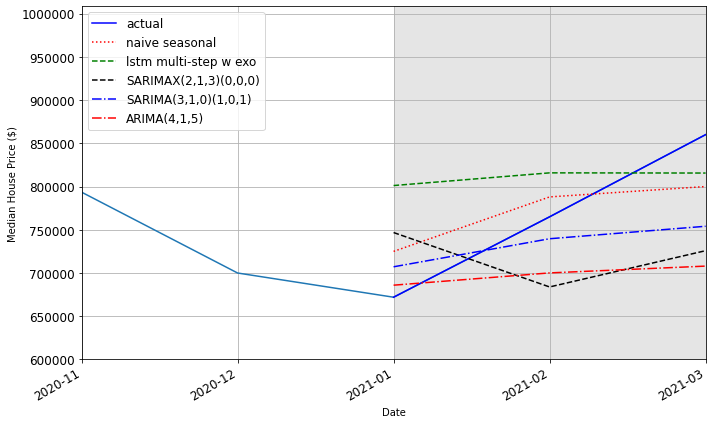

In [375]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Q1_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Q1_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Q1_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Q1_PLOT['pred_SARIMAX_Q1'], 'k--', label='SARIMAX(2,1,3)(0,0,0)')
ax.plot(pred_df_Q1_PLOT['pred_SARIMA_Q1'], 'b-.', label='SARIMA(3,1,0)(1,0,1)')
ax.plot(pred_df_Q1_PLOT['pred_ARIMA_Q1'], 'r-.', label='ARIMA(4,1,5)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(96, 99, color='#808080', alpha=0.2)
ax.set_xlim(94, 98)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [376]:
best_modelSARIMAX = SARIMAX(target_trainQ1, exog_trainQ1, order=(2,1,3), 
 seasonal_order=(0,0,0,12), simple_differencing=False)
best_modelSARIMAX = best_modelSARIMAX.fit(disp=False)
 
print(best_modelSARIMAX.summary())

best_modelSARIMA = SARIMAX(target_trainQ1, order=(3,1,0), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMA = best_modelSARIMA.fit(disp=False)
 
print(best_modelSARIMA.summary())

best_modelARIMA = SARIMAX(target_trainQ1, order=(4,1,5), simple_differencing=False)
best_modelARIMA = best_modelARIMA.fit(disp=False)
 
print(best_modelARIMA.summary())

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Median Price   No. Observations:                   96
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1088.180
Date:                Tue, 29 Aug 2023   AIC                           2210.360
Time:                        07:59:27   BIC                           2253.776
Sample:                             0   HQIC                          2227.903
                                 - 96                                         
Covariance Type:                  opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPI_Can                    2.68e+04      0.005   5.82e+06      0.000    2.68e+04    2.68e+04
New_Housing_Price_Index  -4621.9684      0.001  -4.16e+06      0.000   -4621.971   -4621.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [281]:
# target_testQ2 = t_stats['Median Price'][99:102]
# target_testQ3 = t_stats['Median Price'][102:105]
# target_testQ4 = t_stats['Median Price'][105:108]

target_testQ2 = t_stats['Median Price'][99:102]
pred_df_Q2 = pd.DataFrame({'actual': target_testQ2})
pred_df_Q2['pred_naive_seasonal'] = t_stats['Median Price'].iloc[87:90].values  
TRAIN_LEN = len(target_trainQ2)
HORIZON = len(target_testQ2)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Q2 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# 	(p,q,P,Q)	AIC
# 0	(2, 2, 0, 0)	2288.032052
# 1	(2, 2, 0, 1)	2289.648549
# 2	(2, 2, 1, 0)	2289.717424
# 3	(3, 2, 0, 0)	2289.806928


parList = [3,3,1,0,0,0,12]
pred_SARIMAX_Q2 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df_Q2['pred_last_value_Q2'] = pred_last_value_Q2
pred_df_Q2['pred_SARIMAX_Q2'] = pred_SARIMAX_Q2
pred_df_Q2['pred_SARIMA_Q2'] = test2['SARIMA_pred'].copy()
pred_df_Q2['pred_ARIMA_Q2'] = test2['ARIMA_pred'].copy()

pred_df_Q2['pred_lstm_st'] = [829469.78327632, 835054.92120981, 841444.26470995]

pred_df_Q2['pred_lstm_st1'] = [794011.09462976, 796840.28285742, 801145.82327008]

pred_df_Q2['pred_lstm_mt'] = [840695.19907236, 832310.9922111 , 833721.93959355]

pred_df_Q2['pred_lstm_mt1'] = [813242.77409911, 816646.25498652, 820300.24605989]


mape_last_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_last_value_Q2)
mape_seasonal_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_naive_seasonal)
mape_LSTM_ST_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_lstm_st)
mape_LSTM_MT_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_lstm_mt)
mape_LSTM_ST1_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_lstm_st1)
mape_LSTM_MT1_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_lstm_mt1)
mape_SARIMAX_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_SARIMAX_Q2)
mape_SARIMA_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_SARIMA_Q2)
mape_ARIMA_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_ARIMA_Q2)

rmse_last_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_last_value_Q2)
rmse_seasonal_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_naive_seasonal)
rmse_LSTM_ST_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_lstm_st)
rmse_LSTM_MT_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_lstm_mt)
rmse_LSTM_ST1_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_lstm_st1)
rmse_LSTM_MT1_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_lstm_mt1)
rmse_SARIMAX_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_SARIMAX_Q2)
rmse_SARIMA_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_SARIMA_Q2)
rmse_ARIMA_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_ARIMA_Q2)


print("MAPE LAST_Q2: ", mape_last_Q2)
print("MAPE SEASONAL_Q2: ", mape_seasonal_Q2)
print("MAPE LSTM_ST_Q2: ", mape_LSTM_ST_Q2)
print("MAPE LSTM_MT_Q2: ", mape_LSTM_MT_Q2)
print("MAPE LSTM_ST1_Q2: ", mape_LSTM_ST1_Q2)
print("MAPE LSTM_MT1_Q2: ", mape_LSTM_MT1_Q2)
print("MAPE ARIMA_Q2: ", mape_ARIMA_Q2)
print("MAPE SARIMA_Q2: ", mape_SARIMA_Q2)
print("MAPE SARIMAX_Q2: ", mape_SARIMAX_Q2, '\n')

print("RMSE LAST_Q2: ", rmse_last_Q2)
print("RMSE SEASONAL_Q2: ", rmse_seasonal_Q2)
print("RMSE LSTM_ST_Q2: ", rmse_LSTM_ST_Q2)
print("RMSE LSTM_MT_Q2: ", rmse_LSTM_MT_Q2)
print("RMSE LSTM_ST1_Q2: ", rmse_LSTM_ST1_Q2)
print("RMSE LSTM_MT1_Q2: ", rmse_LSTM_MT1_Q2)
print("RMSE ARIMA_Q2: ", rmse_ARIMA_Q2)
print("RMSE SARIMA_Q2: ", rmse_SARIMA_Q2)
print("RMSE SARIMAX_Q2: ", rmse_SARIMAX_Q2)


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

MAPE LAST_Q2:  2.0175016029765067
MAPE SEASONAL_Q2:  10.695624858447456
MAPE LSTM_ST_Q2:  4.774887563794274
MAPE LSTM_MT_Q2:  4.746919865500409
MAPE LSTM_ST1_Q2:  9.106298767497286
MAPE LSTM_MT1_Q2:  6.895441321858089
MAPE ARIMA_Q2:  3.3289687406681057
MAPE SARIMA_Q2:  2.7739831056337967
MAPE SARIMAX_Q2:  2.3135894910124346 

RMSE LAST_Q2:  18064.698539785637
RMSE SEASONAL_Q2:  98938.53731820916
RMSE LSTM_ST_Q2:  43760.933583812606
RMSE LSTM_MT_Q2:  43252.24576353663
RMSE LSTM_ST1_Q2:  80776.87021239584
RMSE LSTM_MT1_Q2:  61578.11807382827
RMSE ARIMA_Q2:  31150.530938183198
RMSE SARIMA_Q2:  26430.0403861462
RMSE SARIMAX_Q2:  22149.588939034096


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [282]:
pred_df_Q2_PLOT = pred_df_Q2.copy()
pred_df_Q2_PLOT['Month'] = t_stats['Month'].iloc[99:102]
cols = pred_df_Q2_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Q2_PLOT = pred_df_Q2_PLOT[cols]
pred_df_Q2_PLOT

,Month,actual,pred_naive_seasonal,pred_last_value_Q2,pred_SARIMAX_Q2,pred_SARIMA_Q2,pred_ARIMA_Q2,pred_lstm_st,pred_lstm_st1,pred_lstm_mt,pred_lstm_mt1
99,2021-04-01,875000,749950,860000,844042.709213,862505.855282,850454.992294,829469.783276,794011.094630,840695.199072,813242.774099
100,2021-05-01,890000,785000,875000,881111.750929,852733.481845,846077.238394,835054.921210,796840.282857,832310.992211,816646.254987
101,2021-06-01,867000,815000,890000,887843.657216,843532.062792,847521.798264,841444.264710,801145.823270,833721.939594,820300.246060


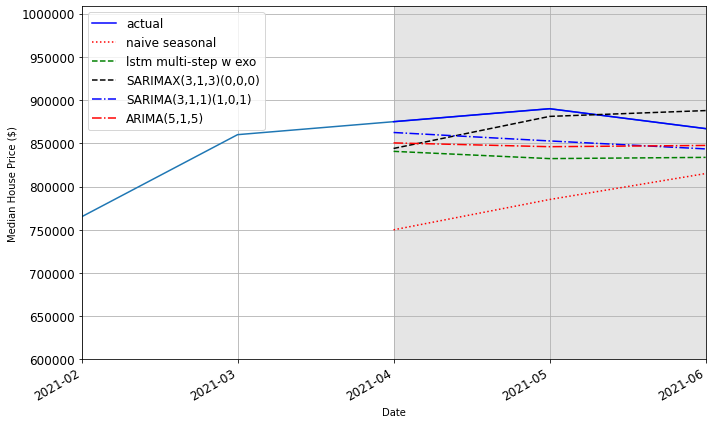

In [285]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Q2_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Q2_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Q2_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Q2_PLOT['pred_SARIMAX_Q2'], 'k--', label='SARIMAX(3,1,3)(0,0,0)')
ax.plot(pred_df_Q2_PLOT['pred_SARIMA_Q2'], 'b-.', label='SARIMA(3,1,1)(1,0,1)')
ax.plot(pred_df_Q2_PLOT['pred_ARIMA_Q2'], 'r-.', label='ARIMA(5,1,5)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(99, 101, color='#808080', alpha=0.2)
ax.set_xlim(97, 101)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [378]:
best_modelSARIMAX = SARIMAX(target_trainQ2, exog_trainQ2, order=(3,1,3), 
 seasonal_order=(0,0,0,12), simple_differencing=False)
best_modelSARIMAX = best_modelSARIMAX.fit(disp=False)
 
print(best_modelSARIMAX.summary())

best_modelSARIMA = SARIMAX(target_trainQ2, order=(3,1,1), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMA = best_modelSARIMA.fit(disp=False)
 
print(best_modelSARIMA.summary())

best_modelARIMA = SARIMAX(target_trainQ2, order=(5,1,5), simple_differencing=False)
best_modelARIMA = best_modelARIMA.fit(disp=False)
 
print(best_modelARIMA.summary())

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Median Price   No. Observations:                   99
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1129.041
Date:                Tue, 29 Aug 2023   AIC                           2294.081
Time:                        08:01:30   BIC                           2340.611
Sample:                             0   HQIC                          2312.901
                                 - 99                                         
Covariance Type:                  opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPI_Can                   2.758e+04   7742.459      3.562      0.000    1.24e+04    4.28e+04
New_Housing_Price_Index   7491.1475   7004.449      1.069      0.285   -6237.320    2.12e

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [309]:
# target_testQ2 = t_stats['Median Price'][99:102]
# target_testQ3 = t_stats['Median Price'][102:105]
# target_testQ4 = t_stats['Median Price'][105:108]

target_testQ3 = t_stats['Median Price'][102:105]
pred_df_Q3 = pd.DataFrame({'actual': target_testQ3})
pred_df_Q3['pred_naive_seasonal'] = t_stats['Median Price'].iloc[90:93].values  
TRAIN_LEN = len(target_trainQ3)
HORIZON = len(target_testQ3)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Q3 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# (p,q,P,Q)	AIC
# 0	(2, 2, 0, 0)	2353.506728
# 1	(3, 3, 0, 0)	2359.239080
# 2	(2, 2, 1, 3)	2360.220597
# 3	(2, 2, 1, 2)	2360.537693
# 4	(3, 3, 0, 2)	2360.727099


parList = [2,2,1,2,2,1,12]
pred_SARIMAX_Q3 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df_Q3['pred_last_value_Q3'] = pred_last_value_Q3
pred_df_Q3['pred_SARIMAX_Q3'] = pred_SARIMAX_Q3
pred_df_Q3['pred_SARIMA_Q3'] = test3['SARIMA_pred'].copy()
pred_df_Q3['pred_ARIMA_Q3'] = test3['ARIMA_pred'].copy()

pred_df_Q3['pred_lstm_st'] = [822578.98044586, 829817.87729263, 836728.09559107]

pred_df_Q3['pred_lstm_st1'] = [825290.83171487, 828426.176548  , 830731.55233264]

pred_df_Q3['pred_lstm_mt'] = [827074.28595424, 824268.05862784, 829302.30376124]

pred_df_Q3['pred_lstm_mt1'] = [821705.65581322, 828582.78340101, 823924.69185591]


mape_last_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_last_value_Q3)
mape_seasonal_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_naive_seasonal)
mape_LSTM_ST_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_lstm_st)
mape_LSTM_MT_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_lstm_mt)
mape_LSTM_ST1_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_lstm_st1)
mape_LSTM_MT1_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_lstm_mt1)
mape_SARIMAX_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_SARIMAX_Q3)
mape_SARIMA_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_SARIMA_Q3)
mape_ARIMA_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_ARIMA_Q3)

rmse_last_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_last_value_Q3)
rmse_seasonal_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_naive_seasonal)
rmse_LSTM_ST_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_lstm_st)
rmse_LSTM_MT_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_lstm_mt)
rmse_LSTM_ST1_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_lstm_st1)
rmse_LSTM_MT1_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_lstm_mt1)
rmse_SARIMAX_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_SARIMAX_Q3)
rmse_SARIMA_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_SARIMA_Q3)
rmse_ARIMA_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_ARIMA_Q3)


print("MAPE LAST_Q3: ", mape_last_Q3)
print("MAPE SEASONAL_Q3: ", mape_seasonal_Q3)
print("MAPE LSTM_ST_Q3: ", mape_LSTM_ST_Q3)
print("MAPE LSTM_MT_Q3: ", mape_LSTM_MT_Q3)
print("MAPE LSTM_ST1_Q3: ", mape_LSTM_ST1_Q3)
print("MAPE LSTM_MT1_Q3: ", mape_LSTM_MT1_Q3)
print("MAPE ARIMA_Q3: ", mape_ARIMA_Q3)
print("MAPE SARIMA_Q3: ", mape_SARIMA_Q3)
print("MAPE SARIMAX_Q3: ", mape_SARIMAX_Q3, '\n')

print("RMSE LAST_Q3: ", rmse_last_Q3)
print("RMSE SEASONAL_Q3: ", rmse_seasonal_Q3)
print("RMSE LSTM_ST_Q3: ", rmse_LSTM_ST_Q3)
print("RMSE LSTM_MT_Q3: ", rmse_LSTM_MT_Q3)
print("RMSE LSTM_ST1_Q3: ", rmse_LSTM_ST1_Q3)
print("RMSE LSTM_MT1_Q3: ", rmse_LSTM_MT1_Q3)
print("RMSE ARIMA_Q3: ", rmse_ARIMA_Q3)
print("RMSE SARIMA_Q3: ", rmse_SARIMA_Q3)
print("RMSE SARIMAX_Q3: ", rmse_SARIMAX_Q3)


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda

MAPE LAST_Q3:  6.305213785735191
MAPE SEASONAL_Q3:  2.3629676979507503
MAPE LSTM_ST_Q3:  3.0039967777491126
MAPE LSTM_MT_Q3:  3.2394070668526376
MAPE LSTM_ST1_Q3:  3.287873291958022
MAPE LSTM_MT1_Q3:  3.412206278592583
MAPE ARIMA_Q3:  4.2937841279878395
MAPE SARIMA_Q3:  3.7516343060035986
MAPE SARIMAX_Q3:  5.155857040501971 

RMSE LAST_Q3:  55150.6421842333
RMSE SEASONAL_Q3:  21286.06743075542
RMSE LSTM_ST_Q3:  29291.796974731686
RMSE LSTM_MT_Q3:  29281.428812579732
RMSE LSTM_ST1_Q3:  30551.025975999153
RMSE LSTM_MT1_Q3:  32746.155729410333
RMSE ARIMA_Q3:  36688.66511575849
RMSE SARIMA_Q3:  37511.40618778044
RMSE SARIMAX_Q3:  49209.03280892715


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [311]:
pred_df_Q3_PLOT = pred_df_Q3.copy()
pred_df_Q3_PLOT['Month'] = t_stats['Month'].iloc[102:105]
cols = pred_df_Q3_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Q3_PLOT = pred_df_Q3_PLOT[cols]
pred_df_Q3_PLOT

,Month,actual,pred_naive_seasonal,pred_last_value_Q3,pred_SARIMAX_Q3,pred_SARIMA_Q3,pred_ARIMA_Q3,pred_lstm_st,pred_lstm_st1,pred_lstm_mt,pred_lstm_mt1
102,2021-07-01,817700,810000,867000,876082.355731,847075.285095,854354.919908,822578.980446,825290.831715,827074.285954,821705.655813
103,2021-08-01,785000,815000,817700,794334.996056,842899.284711,833089.573871,829817.877293,828426.176548,824268.058628,828582.783401
104,2021-09-01,860000,840000,785000,798608.265069,862466.219381,840455.584547,836728.095591,830731.552333,829302.303761,823924.691856


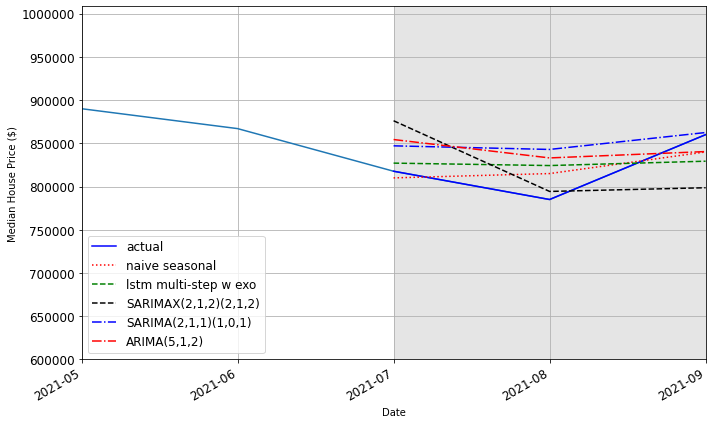

In [315]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Q3_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Q3_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Q3_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Q3_PLOT['pred_SARIMAX_Q3'], 'k--', label='SARIMAX(2,1,2)(2,1,2)')
ax.plot(pred_df_Q3_PLOT['pred_SARIMA_Q3'], 'b-.', label='SARIMA(2,1,1)(1,0,1)')
ax.plot(pred_df_Q3_PLOT['pred_ARIMA_Q3'], 'r-.', label='ARIMA(5,1,2)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(102, 104, color='#808080', alpha=0.2)
ax.set_xlim(100, 104)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [379]:
best_modelSARIMAX = SARIMAX(target_trainQ3, exog_trainQ3, order=(2,1,2), 
 seasonal_order=(2,1,2,12), simple_differencing=False)
best_modelSARIMAX = best_modelSARIMAX.fit(disp=False)
 
print(best_modelSARIMAX.summary())

best_modelSARIMA = SARIMAX(target_trainQ3, order=(2,1,1), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMA = best_modelSARIMA.fit(disp=False)
 
print(best_modelSARIMA.summary())

best_modelARIMA = SARIMAX(target_trainQ3, order=(5,1,2), simple_differencing=False)
best_modelARIMA = best_modelARIMA.fit(disp=False)
 
print(best_modelARIMA.summary())

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Median Price   No. Observations:                  102
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1006.458
Date:                            Tue, 29 Aug 2023   AIC                           2052.916
Time:                                    08:03:23   BIC                           2102.688
Sample:                                         0   HQIC                          2072.978
                                            - 102                                         
Covariance Type:                              opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPI_Can                  -9775.9585   8999.361     -1.086      0.277   -2.74e+04    78

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Median Price   No. Observations:                  102
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -1183.742
Date:                Tue, 29 Aug 2023   AIC                           2383.484
Time:                        08:03:23   BIC                           2404.405
Sample:                             0   HQIC                          2391.954
                                - 102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1628      0.068      2.396      0.017       0.030       0.296
ar.L2         -1.0181      0.072    -14.221      0.000      -1.158      -0.878
ar.L3         -0.0262      0.053     -0.490      0.6

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [395]:
# target_testQ2 = t_stats['Median Price'][99:102]
# target_testQ3 = t_stats['Median Price'][102:105]
# target_testQ4 = t_stats['Median Price'][105:108]

target_testQ4 = t_stats['Median Price'][105:108]
pred_df_Q4 = pd.DataFrame({'actual': target_testQ4})
pred_df_Q4['pred_naive_seasonal'] = t_stats['Median Price'].iloc[93:96].values  
TRAIN_LEN = len(target_trainQ4)
HORIZON = len(target_testQ4)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Q4 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# (p,q,P,Q)	AIC
# 0	(3, 2, 0, 0)	2113.920249
# 1	(3, 2, 1, 0)	2116.088399
# 2	(2, 2, 0, 0)	2116.302475
# 3	(2, 2, 1, 0)	2117.944989
# 4	(2, 2, 0, 1)	2117.983586
# 5	(2, 3, 0, 0)	2118.230719
# 6	(0, 0, 1, 0)	2119.203332
# 7	(1, 0, 0, 0)	2119.222372
# 8	(0, 1, 0, 0)	2119.239695
# 9	(3, 2, 2, 1)	2119.772233


parList = [2,2,1,1,0,1,12]
pred_SARIMAX_Q4 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df_Q4['pred_last_value_Q4'] = pred_last_value_Q4
pred_df_Q4['pred_SARIMAX_Q4'] = pred_SARIMAX_Q4
pred_df_Q4['pred_SARIMA_Q4'] = test4['SARIMA_pred'].copy()
pred_df_Q4['pred_ARIMA_Q4'] = test4['ARIMA_pred'].copy()

pred_df_Q4['pred_lstm_st'] = [838428.85681987, 846656.32176399, 855222.83142805]

pred_df_Q4['pred_lstm_st1'] = [853732.36504197, 858567.42435694, 863218.49256754]

pred_df_Q4['pred_lstm_mt'] = [875687.09334731, 836066.8554008 , 843635.49029827]

pred_df_Q4['pred_lstm_mt1'] = [860948.16592336, 864901.08767152, 865208.45985413]


mape_last_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_last_value_Q4)
mape_seasonal_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_naive_seasonal)
mape_LSTM_ST_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_lstm_st)
mape_LSTM_MT_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_lstm_mt)
mape_LSTM_ST1_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_lstm_st1)
mape_LSTM_MT1_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_lstm_mt1)
mape_SARIMAX_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_SARIMAX_Q4)
mape_SARIMA_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_SARIMA_Q4)
mape_ARIMA_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_ARIMA_Q4)

rmse_last_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_last_value_Q4)
rmse_seasonal_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_naive_seasonal)
rmse_LSTM_ST_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_lstm_st)
rmse_LSTM_MT_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_lstm_mt)
rmse_LSTM_ST1_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_lstm_st1)
rmse_LSTM_MT1_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_lstm_mt1)
rmse_SARIMAX_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_SARIMAX_Q4)
rmse_SARIMA_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_SARIMA_Q4)
rmse_ARIMA_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_ARIMA_Q4)


print("MAPE LAST_Q4: ", mape_last_Q4)
print("MAPE SEASONAL_Q4: ", mape_seasonal_Q4)
print("MAPE LSTM_ST_Q4: ", mape_LSTM_ST_Q4)
print("MAPE LSTM_MT_Q4: ", mape_LSTM_MT_Q4)
print("MAPE LSTM_ST1_Q4: ", mape_LSTM_ST1_Q4)
print("MAPE LSTM_MT1_Q4: ", mape_LSTM_MT1_Q4)
print("MAPE ARIMA_Q4: ", mape_ARIMA_Q4)
print("MAPE SARIMA_Q4: ", mape_SARIMA_Q4)
print("MAPE SARIMAX_Q4: ", mape_SARIMAX_Q4, '\n')

print("RMSE LAST_Q4: ", rmse_last_Q4)
print("RMSE SEASONAL_Q4: ", rmse_seasonal_Q4)
print("RMSE LSTM_ST_Q4: ", rmse_LSTM_ST_Q4)
print("RMSE LSTM_MT_Q4: ", rmse_LSTM_MT_Q4)
print("RMSE LSTM_ST1_Q4: ", rmse_LSTM_ST1_Q4)
print("RMSE LSTM_MT1_Q4: ", rmse_LSTM_MT1_Q4)
print("RMSE ARIMA_Q4: ", rmse_ARIMA_Q4)
print("RMSE SARIMA_Q4: ", rmse_SARIMA_Q4)
print("RMSE SARIMAX_Q4: ", rmse_SARIMAX_Q4)


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE LAST_Q4:  3.9932585789614943
MAPE SEASONAL_Q4:  7.779875524444811
MAPE LSTM_ST_Q4:  4.083339295751556
MAPE LSTM_MT_Q4:  2.0838198930671967
MAPE LSTM_ST1_Q4:  4.30923774557604
MAPE LSTM_MT1_Q4:  4.370235584850163
MAPE ARIMA_Q4:  5.582364952031579
MAPE SARIMA_Q4:  2.402348180872259
MAPE SARIMAX_Q4:  5.2107338678165975 

RMSE LAST_Q4:  34417.14688930505
RMSE SEASONAL_Q4:  69697.65658423053
RMSE LSTM_ST_Q4:  39500.102985821424
RMSE LSTM_MT_Q4:  24332.132901338595
RMSE LSTM_ST1_Q4:  40127.02110675304
RMSE LSTM_MT1_Q4:  40879.69849602475
RMSE ARIMA_Q4:  49800.24778154402
RMSE SARIMA_Q4:  22104.328307637035
RMSE SARIMAX_Q4:  47012.21354314172


In [396]:
pred_df_Q4_PLOT = pred_df_Q4.copy()
pred_df_Q4_PLOT['Month'] = t_stats['Month'].iloc[105:108]
cols = pred_df_Q4_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Q4_PLOT = pred_df_Q4_PLOT[cols]
pred_df_Q4_PLOT

,Month,actual,pred_naive_seasonal,pred_last_value_Q4,pred_SARIMAX_Q4,pred_SARIMA_Q4,pred_ARIMA_Q4,pred_lstm_st,pred_lstm_st1,pred_lstm_mt,pred_lstm_mt1
105,2021-10-01,880900,836100,860000,814380.389679,874178.702555,901090.440878,838428.856820,853732.365042,875687.093347,860948.165923
106,2021-11-01,840000,793500,880900,874460.380071,862316.052999,898882.462500,846656.321764,858567.424357,836066.855401,864901.087672
107,2021-12-01,802000,700000,840000,833907.182809,832374.692245,861710.934881,855222.831428,863218.492568,843635.490298,865208.459854


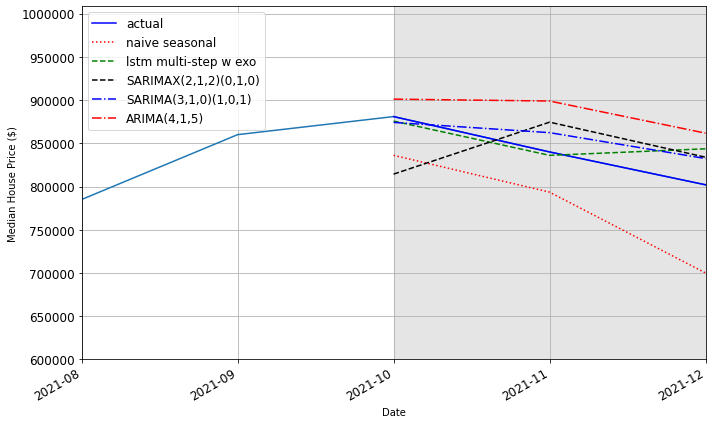

In [397]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Q4_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Q4_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Q4_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Q4_PLOT['pred_SARIMAX_Q4'], 'k--', label='SARIMAX(2,1,2)(0,1,0)')
ax.plot(pred_df_Q4_PLOT['pred_SARIMA_Q4'], 'b-.', label='SARIMA(3,1,0)(1,0,1)')
ax.plot(pred_df_Q4_PLOT['pred_ARIMA_Q4'], 'r-.', label='ARIMA(4,1,5)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(105, 107, color='#808080', alpha=0.2)
ax.set_xlim(103, 107)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [380]:
best_modelSARIMAX = SARIMAX(target_trainQ4, exog_trainQ4, order=(2,1,2), 
 seasonal_order=(0,1,0,12), simple_differencing=False)
best_modelSARIMAX = best_modelSARIMAX.fit(disp=False)
 
print(best_modelSARIMAX.summary())

best_modelSARIMA = SARIMAX(target_trainQ4, order=(3,1,0), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMA = best_modelSARIMA.fit(disp=False)
 
print(best_modelSARIMA.summary())

best_modelARIMA = SARIMAX(target_trainQ4, order=(4,1,5), simple_differencing=False)
best_modelARIMA = best_modelARIMA.fit(disp=False)
 
print(best_modelARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        Median Price   No. Observations:                  105
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood               -1042.151
Date:                             Tue, 29 Aug 2023   AIC                           2116.302
Time:                                     08:47:05   BIC                           2156.651
Sample:                                          0   HQIC                          2132.588
                                             - 105                                         
Covariance Type:                               opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPI_Can                  -9099.4697   5939.672     -1.532      0.126   -2.07e+

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
